<a href="https://colab.research.google.com/github/WuraolaOyewusi/Prediction-Diabetes-from-Glyheamoglobin-Values-Using-Machine-Learning/blob/master/Glycoheamoglobin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

Data obtained from http://biostat.mc.vanderbilt.edu/DataSets".


In [0]:
nhanes = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/nhgh.tsv',sep ='\t')

In [129]:
nhanes.head()

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79


In [130]:
nhanes.shape

(6795, 20)

http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/nhgh.html

Feature selection

In [0]:
nhanes_sub = nhanes[['seqn','sex','age','bmi','waist','gh','albumin','bun','SCr']].copy()

In [132]:
nhanes_sub.head()

,seqn,sex,age,bmi,waist,gh,albumin,bun,SCr
0,51624,male,34.166667,32.22,100.4,5.2,4.8,6.0,0.94
1,51626,male,16.833333,22.00,74.7,5.7,4.6,9.0,0.89
2,51628,female,60.166667,42.39,118.2,6.0,3.9,10.0,1.11
3,51629,male,26.083333,32.61,103.7,5.1,4.2,8.0,0.80
4,51630,female,49.666667,30.57,107.8,5.3,4.3,13.0,0.79


In [133]:
nhanes_sub['seqn'].nunique()

6795

In [176]:
nhanes_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 11 columns):
seqn         6795 non-null int64
sex          6795 non-null object
age          6795 non-null float64
bmi          6795 non-null float64
waist        6556 non-null float64
gh           6795 non-null float64
albumin      6706 non-null float64
bun          6706 non-null float64
SCr          6706 non-null float64
gh_int       6795 non-null int64
age_range    6795 non-null category
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 537.9+ KB


In [0]:
nhanes_sub.dropna(inplace=True)

In [178]:
nhanes_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 6794
Data columns (total 11 columns):
seqn         6475 non-null int64
sex          6475 non-null object
age          6475 non-null float64
bmi          6475 non-null float64
waist        6475 non-null float64
gh           6475 non-null float64
albumin      6475 non-null float64
bun          6475 non-null float64
SCr          6475 non-null float64
gh_int       6475 non-null int64
age_range    6475 non-null category
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 563.1+ KB


In [0]:
nhanes_sub['gh_int'] = nhanes_sub['gh'].map(lambda x:int(2) if x>=6.5 else int(0) if x<5.7 else int(1) )

In [135]:
nhanes_sub.head(30)

,seqn,sex,age,bmi,waist,gh,albumin,bun,SCr,gh_int
0,51624,male,34.166667,32.22,100.4,5.2,4.8,6.0,0.94,0
1,51626,male,16.833333,22.00,74.7,5.7,4.6,9.0,0.89,1
2,51628,female,60.166667,42.39,118.2,6.0,3.9,10.0,1.11,1
3,51629,male,26.083333,32.61,103.7,5.1,4.2,8.0,0.80,0
4,51630,female,49.666667,30.57,107.8,5.3,4.3,13.0,0.79,0
5,51633,male,80.000000,26.04,91.1,5.4,4.3,16.0,0.83,0
6,51635,male,80.000000,27.62,113.7,6.8,4.3,16.0,0.90,2
7,51640,male,17.416667,25.97,86.0,5.1,4.7,11.0,1.00,0
8,51641,male,13.000000,16.60,63.6,5.6,4.3,10.0,0.46,0
9,51643,female,43.000000,39.90,129.8,11.0,3.6,16.0,2.54,2


In [136]:
age_ranges = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
age_ranges

['[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [137]:
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges

8

In [0]:
nhanes_sub['age_range'] = pd.cut(x=nhanes_sub['age'], bins=count_unique_age_ranges, labels=age_ranges)

In [139]:
nhanes_sub.head()

,seqn,sex,age,bmi,waist,gh,albumin,bun,SCr,gh_int,age_range
0,51624,male,34.166667,32.22,100.4,5.2,4.8,6.0,0.94,0,[40 - 50)
1,51626,male,16.833333,22.00,74.7,5.7,4.6,9.0,0.89,1,[20 - 30)
2,51628,female,60.166667,42.39,118.2,6.0,3.9,10.0,1.11,1,[70 - 80)
3,51629,male,26.083333,32.61,103.7,5.1,4.2,8.0,0.80,0,[30 - 40)
4,51630,female,49.666667,30.57,107.8,5.3,4.3,13.0,0.79,0,[60 - 70)


In [140]:
nhanes_sub['sex'].value_counts()

female    3423
male      3372
Name: sex, dtype: int64

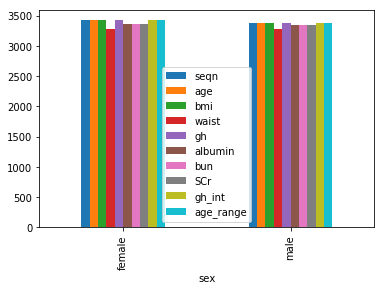

In [141]:
nhanes_sub.groupby('sex').count().plot.bar()

In [142]:
nhanes_sub['age_range'].value_counts()

[20 - 30)     1219
[50 - 60)      878
[90 - 100)     862
[60 - 70)      830
[70 - 80)      814
[30 - 40)      783
[40 - 50)      764
[80 - 90)      645
Name: age_range, dtype: int64

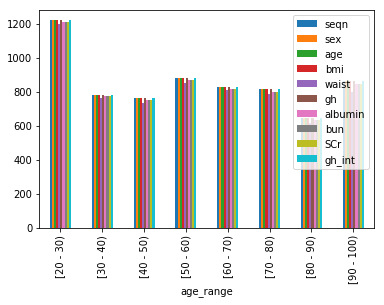

In [143]:
nhanes_sub.groupby('age_range').count().plot.bar()

In [144]:
nhanes_sub['gh_int'].value_counts()

0    4380
1    1787
2     628
Name: gh_int, dtype: int64

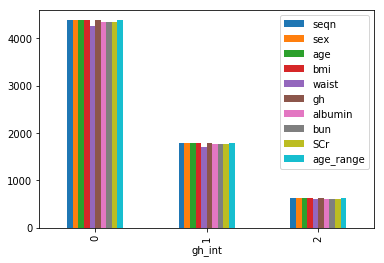

In [145]:
nhanes_sub.groupby('gh_int').count().plot.bar()

In [146]:
nhanes_sub.head()

,seqn,sex,age,bmi,waist,gh,albumin,bun,SCr,gh_int,age_range
0,51624,male,34.166667,32.22,100.4,5.2,4.8,6.0,0.94,0,[40 - 50)
1,51626,male,16.833333,22.00,74.7,5.7,4.6,9.0,0.89,1,[20 - 30)
2,51628,female,60.166667,42.39,118.2,6.0,3.9,10.0,1.11,1,[70 - 80)
3,51629,male,26.083333,32.61,103.7,5.1,4.2,8.0,0.80,0,[30 - 40)
4,51630,female,49.666667,30.57,107.8,5.3,4.3,13.0,0.79,0,[60 - 70)


In [0]:
nhanes_sub2 = nhanes_sub[['bmi','waist','gh','albumin','bun','SCr','gh_int']].copy()

In [0]:
corr = nhanes_sub2.corr()

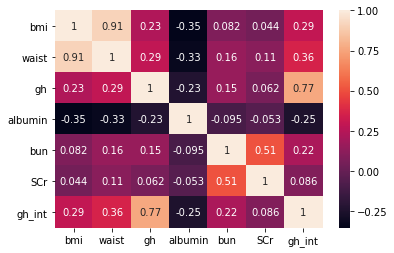

In [149]:
import seaborn as sns
sns.heatmap(corr,annot = True)


In [150]:
nhanes_sub2.head()

,bmi,waist,gh,albumin,bun,SCr,gh_int
0,32.22,100.4,5.2,4.8,6.0,0.94,0
1,22.00,74.7,5.7,4.6,9.0,0.89,1
2,42.39,118.2,6.0,3.9,10.0,1.11,1
3,32.61,103.7,5.1,4.2,8.0,0.80,0
4,30.57,107.8,5.3,4.3,13.0,0.79,0


In [179]:
nhanes_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 7 columns):
bmi        6795 non-null float64
waist      6556 non-null float64
gh         6795 non-null float64
albumin    6706 non-null float64
bun        6706 non-null float64
SCr        6706 non-null float64
gh_int     6795 non-null int64
dtypes: float64(6), int64(1)
memory usage: 371.7 KB


In [0]:
nhanes_sub2.dropna(inplace=True)

In [181]:
nhanes_sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 6794
Data columns (total 7 columns):
bmi        6475 non-null float64
waist      6475 non-null float64
gh         6475 non-null float64
albumin    6475 non-null float64
bun        6475 non-null float64
SCr        6475 non-null float64
gh_int     6475 non-null int64
dtypes: float64(6), int64(1)
memory usage: 404.7 KB


In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set,train_label,test_label = train_test_split(nhanes_sub2[['bmi','waist','gh','albumin','bun','SCr']],nhanes_sub2['gh_int'],
                                                              test_size=0.33,random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier

In [0]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [0]:
results = []
names = []
X = train_set_scaled
y = train_label
seed = 5

In [201]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})". format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.8139744149168273 (0.023532563153236836)
KNN: 0.8743611711241899 (0.015196588169817608)
NB: 0.9193143963985058 (0.015948207726423427)
SVC: 0.9619671991570972 (0.008747562663655305)
RFC: 1.0 (0.0)
DTR: 1.0 (0.0)
XGB: 1.0 (0.0)


In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [0]:
Decision_tree_model = DecisionTreeRegressor()
Decision_tree_model.fit(train_set_scaled,train_label)
Decision_tree_prediction = Decision_tree_model.predict(test_set_scaled)

In [213]:
print( 'Decision Tree Classification Report:\n', classification_report(test_label,Decision_tree_prediction,target_names=['0','1','2']))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00       546
           2       1.00      1.00      1.00       203

   micro avg       1.00      1.00      1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



In [214]:
print('Decision Tree Accuracy Score:\n', accuracy_score(test_label,Decision_tree_prediction))

Decision Tree Accuracy Score:
 1.0


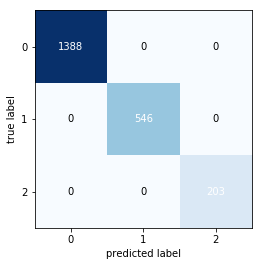

In [217]:
Decision_tree_matrix = confusion_matrix(test_label,Decision_tree_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=Decision_tree_matrix)
plt.show()

In [0]:
Logistic_regression_model = LogisticRegression(solver ='lbfgs',multi_class='auto')
Logistic_regression_model.fit(train_set_scaled,train_label)
Logistic_regression_prediction = Logistic_regression_model.predict(test_set_scaled)

In [219]:
print( 'Logistic Regression Classification Report:\n', classification_report(test_label,Logistic_regression_prediction,target_names=['0','1','2']))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1388
           1       0.74      0.52      0.61       546
           2       1.00      0.54      0.70       203

   micro avg       0.83      0.83      0.83      2137
   macro avg       0.86      0.68      0.74      2137
weighted avg       0.83      0.83      0.81      2137



In [220]:
print('Logistic Regression Accuracy Score:\n', accuracy_score(test_label,Logistic_regression_prediction))

Logistic Regression Accuracy Score:
 0.8306036499766027


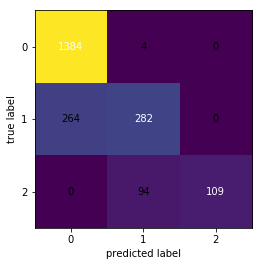

In [224]:
Logistic_regression_matrix = confusion_matrix(test_label,Logistic_regression_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=Logistic_regression_matrix,cmap='viridis')
plt.show()